# LEAD SCORING ASSINGMENT 

### READING AND UNDERSTANDING THE DATA

In [1]:
## IMPORTING ALL THE REQUIRED LIBRARYS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


In [2]:
# viewing the head and tail of the data

lead = pd.read_csv('leads.csv')

lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# finding the number of total rows and columns of the data using shape function.

lead.shape

(9240, 37)

In [4]:
# finding the numerical values of the data using describe function.

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# finding the number of columns.

lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
# CHECKING INFO AND TYPES OF VARIABLES.

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### DATA CLEANING AND PREPRATION

In [7]:
# FINDING THE NULL VALUES

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# DROPPING THE COLUMNS WHICH HAVE HIGHER NULL VALUES.

for col in lead.columns:
    if lead[col].isnull().sum() > 3000:
        lead.drop(col, 1, inplace=True)

In [9]:
# finding the total numbers of null values.

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# using drop to drop a specific column or any row.

lead.drop(['City'], 1, inplace=True)

In [11]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
lead.drop(['Country'], 1, inplace=True)

In [13]:
# using info to view entire information about the data.

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [14]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [15]:
for column in lead:
    print(lead[column].astype('category').value_counts())
    print('____________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
____________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
____________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
________________________________

In [16]:
lead['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
lead.drop(['Lead Profile' , 'How did you hear about X Education'], axis= 1, inplace=True)

In [20]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [21]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [22]:
# DROPPING THE COLUMNS AS IT HAS 0 VALUES.

lead.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis=1, inplace=True)

In [23]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [24]:
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
A free copy of Mastering The Interview              0
Last Notable Activity                               0
dtype: int64

In [25]:

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
# dropping the column as it has high number of null values.

lead.drop(['What matters most to you in choosing a course'], 1, inplace= True)

In [27]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [28]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [30]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          7802 non-null   obje

In [31]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [32]:
lead = lead[~pd.isnull(lead['Lead Source'])]

In [33]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                130
Total Time Spent on Website                  0
Page Views Per Visit                       130
Last Activity                              101
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [34]:
lead = lead[~pd.isnull(lead['TotalVisits'])]

In [35]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [36]:
lead = lead[~pd.isnull(lead['Specialization'])]

In [37]:
lead.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [38]:
lead = lead[~pd.isnull(lead['What is your current occupation'])]

In [39]:
lead.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [ ]:
## after cleanup 0 null values are left 

In [40]:
print(len(lead.index))


6373


In [41]:
# SO OUT OF 100 WE LEFT 69 % OF RAW DATA WHICH IS GOOD ENOUGH FOR THE FURTHER ANALYSIS.

print(len(lead.index)/9240)

0.6897186147186147


In [42]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [43]:
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [44]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


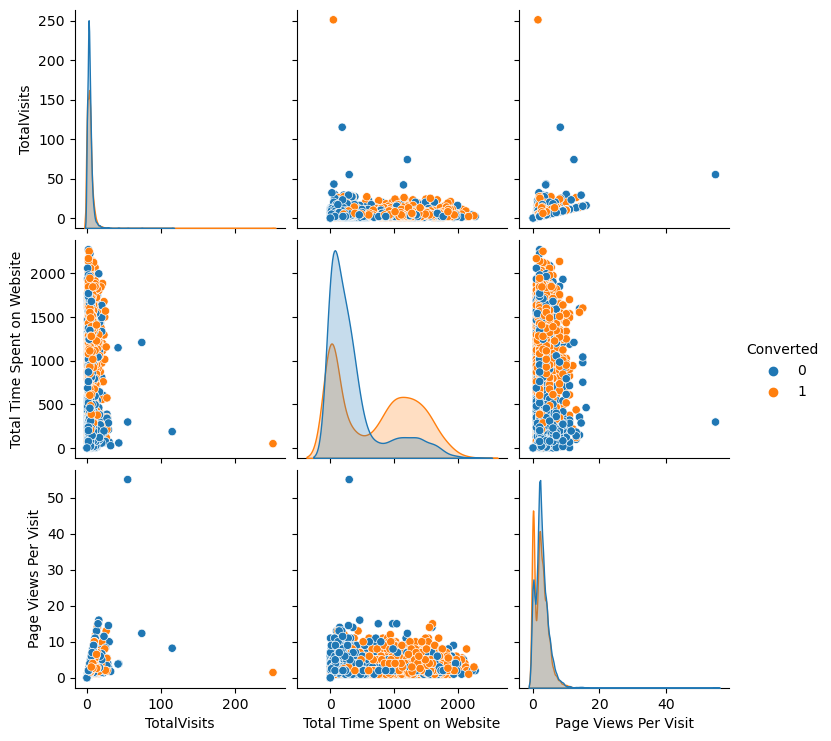

In [45]:
sns.pairplot(lead, diag_kind ='kde',hue='Converted')
plt.show()

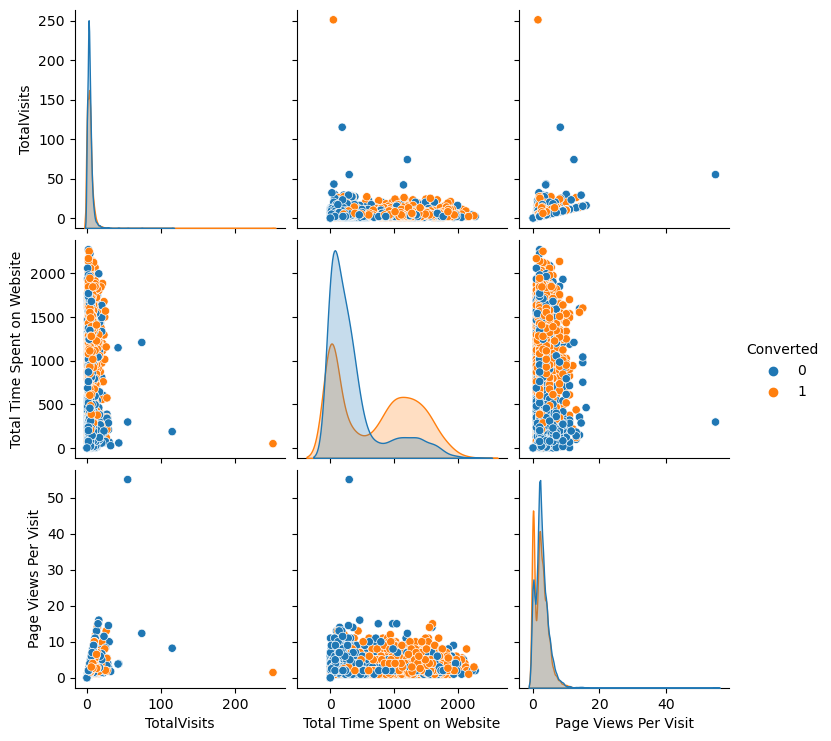

In [46]:
edu = lead[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]

sns.pairplot(edu,diag_kind='kde',hue='Converted')
plt.show()

In [47]:
## importing the PowerTransformer library fron sklearn

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
transformededu = pd.DataFrame(pt.fit_transform(edu))
transformededu.columns = edu.columns
transformededu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


### CREATING A DUMMY VARIABLES

In [48]:
# LETS CREATE A DUMMY VARIABLES FOR CATEGORICAL COLUMNS


dummy_col = lead.loc[:, lead.dtypes == object]

dummy_col.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
dummy = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first = True)

In [50]:
lead = pd.concat([lead, dummy], axis = 1)

In [51]:
dummy1 = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
dummy1 = dummy1.drop(['Specialization_Select'], axis=1)

lead = pd.concat([lead , dummy1], axis = 1)

In [52]:
lead = lead.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [53]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [54]:
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.00000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,637

### SPLITTING THE DATA INTO TRAIN AND TEST

In [55]:
X = lead.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [56]:
y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# USING THE TEST_TRAIN_SPLIT TO SPLIT THE DATE FOR TRAINING


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [58]:
# SCALING THE NUMERIC FEATURE USING MIN MAX SCALER.

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,

In [59]:
Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100

print('Overall Percentage of Converted Leads :',Converted)

Overall Percentage of Converted Leads : 48.093519535540565


# MODEL BUILDING

In [60]:
# IMPORTING THE SKLEARN LIBRARY


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg , n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [61]:
# USING RECURSIVE FEATURE ELEMINATION.

rfe.support_

array([ True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [62]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 16),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Pay per Click Ads', False, 36),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 39),
 ('Lead Source_Social Media', False, 76),
 ('Lead Source_WeLearn', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 23),
 ('Lead Source_testone', False, 35),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 12),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link 

In [63]:
columns = X_train.columns[rfe.support_]

columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Select', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [64]:
X_train = X_train[columns]

### Model 1

In [65]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
log_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Sun, 15 Oct 2023   Deviance:                       4134.4
Time:                        01:05:45   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

### Model 2

In [66]:
# IMPORTING THE STATS MODEL LIBRARY

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# CHECKING THE VIF

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.13
6,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.39
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.71
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


### Model 3

In [68]:
# CHECKING THE P-VALUE WHICH IS GRATER THAN 0.05 NEED TO BE DROPPED.

log_2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2067.2
Date:                Sun, 15 Oct 2023   Deviance:                       4134.4
Time:                        01:05:45   Pearson chi2:                 4.83e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3676
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9490      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.2343      2.636      3.882      0.000       5.068      15.401
Total Time Spent on Website                              4.4045      0.186     23.735      0.000       4.041       4.768
Lead Origin_Lead Add Form                                4.2361      0.259     16.363      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6324      0.133     12.267      0.000       1.372       1.893
Lead Source_Welingak Website                             2.3444      1.038      2.258      0.024       0.310       4.379
Do Not Email_Yes                                        -1.5177      0.192     -7.892      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   1.1713      0.987      1.186      0.235      -0.764       3.106
Last Activity_SMS Sent                                   1.1787      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3400      0.098     -3.464      0.001      -0.532      -0.148
What is your current occupation_Housewife               22.6104   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1260      0.634     -1.776      0.076      -2.369       0.117
What is your current occupation_Unemployed              -1.2968      0.598     -2.169      0.030      -2.468      -0.125
What is your current occupation_Working Professional     1.2483      0.627      1.992      0.046       0.020       2.476
Last Notable Activity_Had a Phone Conversation          23.0106   2.09e+04      0.001      0.999   -4.09e+04     4.1e+04
Last Notable Activity_Unreachable                        2.7670      0.807      3.429      0.001       1.186       4.348
========================================================================================================================
"""

In [69]:
# DROPPING THE VARIABLE WHICH HAVE HIGH P-VALUE


X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

### Model 4

In [70]:
# CHECKING THE P-VALUE WHICH IS GRATER THAN 0.05 NEED TO BE DROPPED.

log_2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.8
Date:                Sun, 15 Oct 2023   Deviance:                       4139.6
Time:                        01:05:45   Pearson chi2:                 4.84e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3668
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9489      0.603     -1.573      0.116      -2.131       0.233
TotalVisits                                             10.3097      2.639      3.907      0.000       5.138      15.481
Total Time Spent on Website                              4.3972      0.185     23.710      0.000       4.034       4.761
Lead Origin_Lead Add Form                                4.2368      0.259     16.365      0.000       3.729       4.744
Lead Source_Olark Chat                                   1.6359      0.133     12.290      0.000       1.375       1.897
Lead Source_Welingak Website                             2.3482      1.038      2.262      0.024       0.313       4.383
Do Not Email_Yes                                        -1.5182      0.192     -7.896      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation                   2.7613      0.800      3.452      0.001       1.193       4.329
Last Activity_SMS Sent                                   1.1786      0.082     14.307      0.000       1.017       1.340
Specialization_Select                                   -0.3472      0.098     -3.536      0.000      -0.540      -0.155
What is your current occupation_Housewife               21.6107   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1240      0.634     -1.773      0.076      -2.366       0.118
What is your current occupation_Unemployed              -1.2945      0.598     -2.166      0.030      -2.466      -0.123
What is your current occupation_Working Professional     1.2477      0.626      1.992      0.046       0.020       2.476
Last Notable Activity_Unreachable                        2.7659      0.807      3.428      0.001       1.185       4.347
========================================================================================================================
"""

In [71]:
# DROPPING THE VARIABLE WHICH HAVE HIGH P-VALUE

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [72]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.11
1,Total Time Spent on Website,2.38
8,Specialization_Select,1.90
2,Lead Origin_Lead Add Form,1.70
3,Lead Source_Olark Chat,1.66
0,TotalVisits,1.63
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
4,Lead Source_Welingak Website,1.37
9,What is your current occupation_Student,1.10


### Model 5

In [73]:
# CHECKING THE P-VALUE WHICH IS GRATER THAN 0.05 NEED TO BE DROPPED.

log_2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.0
Date:                Sun, 15 Oct 2023   Deviance:                       4143.9
Time:                        01:05:45   Pearson chi2:                 4.84e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3662
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4009      0.556     -0.721      0.471      -1.491       0.689
TotalVisits                                             10.1186      2.624      3.856      0.000       4.975      15.262
Total Time Spent on Website                              4.3951      0.185     23.707      0.000       4.032       4.758
Lead Origin_Lead Add Form                                4.2345      0.259     16.363      0.000       3.727       4.742
Lead Source_Olark Chat                                   1.6319      0.133     12.268      0.000       1.371       1.893
Lead Source_Welingak Website                             2.3476      1.038      2.261      0.024       0.313       4.382
Do Not Email_Yes                                        -1.5207      0.192     -7.901      0.000      -1.898      -1.143
Last Activity_Had a Phone Conversation                   2.7626      0.800      3.454      0.001       1.195       4.330
Last Activity_SMS Sent                                   1.1783      0.082     14.305      0.000       1.017       1.340
Specialization_Select                                   -0.3488      0.098     -3.553      0.000      -0.541      -0.156
What is your current occupation_Student                 -1.6673      0.591     -2.821      0.005      -2.826      -0.509
What is your current occupation_Unemployed              -1.8376      0.552     -3.329      0.001      -2.920      -0.756
What is your current occupation_Working Professional     0.7040      0.583      1.208      0.227      -0.439       1.847
Last Notable Activity_Unreachable                        2.7623      0.807      3.422      0.001       1.180       4.345
========================================================================================================================
"""

In [74]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [75]:
# CHECKING THE VIF OF THE DATAFRAME

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


In [76]:
log_2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.6
Date:                Sun, 15 Oct 2023   Deviance:                       4145.3
Time:                        01:05:45   Pearson chi2:                 4.81e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2371      0.196      1.211      0.226      -0.147       0.621
TotalVisits                                   10.0121      2.618      3.825      0.000       4.882      15.143
Total Time Spent on Website                    4.3957      0.185     23.708      0.000       4.032       4.759
Lead Origin_Lead Add Form                      4.2341      0.259     16.364      0.000       3.727       4.741
Lead Source_Olark Chat                         1.6321      0.133     12.275      0.000       1.371       1.893
Lead Source_Welingak Website                   2.3468      1.038      2.260      0.024       0.312       4.382
Do Not Email_Yes                              -1.5182      0.192     -7.891      0.000      -1.895      -1.141
Last Activity_Had a Phone Conversation         2.7664      0.800      3.459      0.001       1.199       4.334
Last Activity_SMS Sent                         1.1815      0.082     14.361      0.000       1.020       1.343
Specialization_Select                         -0.3500      0.098     -3.565      0.000      -0.542      -0.158
What is your current occupation_Student       -2.3044      0.283     -8.155      0.000      -2.858      -1.751
What is your current occupation_Unemployed    -2.4751      0.187    -13.230      0.000      -2.842      -2.108
Last Notable Activity_Unreachable              2.7631      0.807      3.422      0.001       1.181       4.346
==============================================================================================================
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.25
1,Total Time Spent on Website,2.01
8,Specialization_Select,1.90
3,Lead Source_Olark Chat,1.56
0,TotalVisits,1.55
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.46
4,Lead Source_Welingak Website,1.34
5,Do Not Email_Yes,1.08
9,What is your current occupation_Student,1.08


In [80]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:11]

8003    0.315577
218     0.151844
4171    0.135876
4037    0.278192
3660    0.959650
207     0.156043
2044    0.143676
6411    0.952580
6498    0.079814
2085    0.981919
6260    0.313756
dtype: float64

In [81]:
# using the numpy array for reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:11]

array([0.3155766 , 0.1518439 , 0.13587609, 0.27819235, 0.95965009,
       0.1560432 , 0.14367596, 0.95258003, 0.07981364, 0.98191931,
       0.31375614])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.315577
1,0,0.151844
2,1,0.135876
3,1,0.278192
4,1,0.959650


In [83]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.315577,0
1,0,0.151844,0
2,1,0.135876,0
3,1,0.278192,0
4,1,0.959650,1


### Confusion matrix

In [84]:
# importing the confusion metrics from sklearn library


from sklearn import metrics

 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1928  384]
 [ 567 1582]]


In [85]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7868190988567586


### FINDING THE CUTOFF

In [86]:
# defining the function for ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [96]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

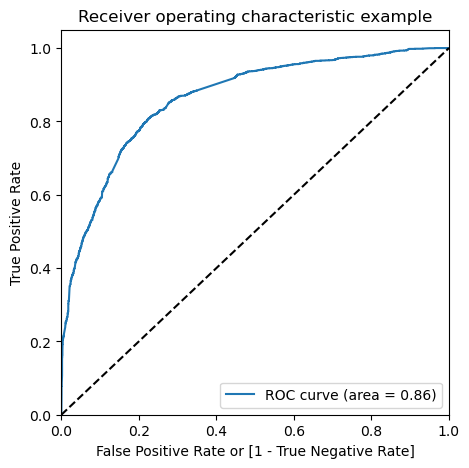

In [97]:
# roc curve indicates the data accuracy level.

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [98]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.315577,0,1,1,1,1,0,0,0,0,0,0
1,0,0.151844,0,1,1,0,0,0,0,0,0,0,0
2,1,0.135876,0,1,1,0,0,0,0,0,0,0,0
3,1,0.278192,0,1,1,1,0,0,0,0,0,0,0
4,1,0.959650,1,1,1,1,1,1,1,1,1,1,1


In [102]:
# importing the confusion_matrix library

from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.538668  0.993485  0.115917
0.2   0.2  0.695584  0.944625  0.464100
0.3   0.3  0.769110  0.876221  0.669550
0.4   0.4  0.789733  0.809214  0.771626
0.5   0.5  0.786819  0.736156  0.833910
0.6   0.6  0.762609  0.635644  0.880623
0.7   0.7  0.739072  0.548162  0.916522
0.8   0.8  0.709931  0.449046  0.952422
0.9   0.9  0.646940  0.286180  0.982266


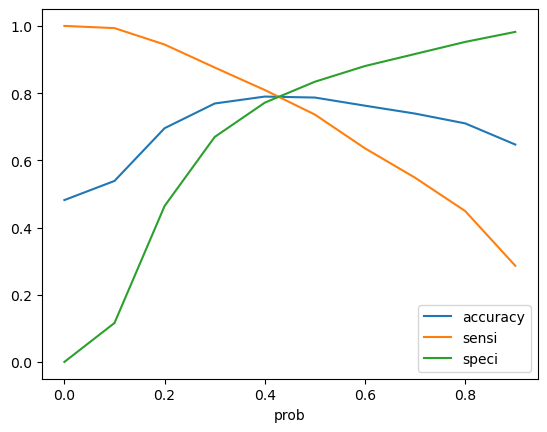

In [103]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [107]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.315577,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.151844,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.135876,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.278192,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.959650,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7691100650078457

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[1548,  764],
       [ 266, 1883]], dtype=int64)

In [111]:
TP = confusion2[1,1] 
TN = confusion2[0,0]
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [112]:
TP / float(TP+FN)

0.8762214983713354

In [113]:
TN / float(TN+FP)

0.6695501730103807

In [ ]:
## Accuracy    : 76.91 %
## Sensitivity : 87.62%
## Specificity : 66.69%